D212 - Data Mining II

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load medical_clean CSV
df=pd.read_csv('C:/Users/Kmoik WGU/Desktop/D212/medical_clean.csv')

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
#search for duplicates
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [6]:
#check for null values - even though view of data indicates no nulls
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [7]:
red_df=df[['Children', 'Age', 'Income', 'Initial_days', 'TotalCharge']]

In [8]:
clusterdata=red_df.describe().round(2)
clusterdata

,Children,Age,Income,Initial_days,TotalCharge
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2.10,53.51,40490.50,34.46,5312.17
std,2.16,20.64,28521.15,26.31,2180.39
min,0.00,18.00,154.08,1.00,1938.31
25%,0.00,36.00,19598.78,7.90,3179.37
50%,1.00,53.00,33768.42,35.84,5213.95
75%,3.00,71.00,54296.40,61.16,7459.70
max,10.00,89.00,207249.10,71.98,9180.73


In [9]:
#normalize data using z-score
scaler=StandardScaler()

In [10]:
#scaled df
scaled_df=scaler.fit_transform(red_df)

In [11]:
scaled_df=pd.DataFrame(scaled_df)
scaled_df

,0,1,2,3,4
0,-0.507129,-0.024795,1.615914,-0.907310,-0.727185
1,0.417277,-0.121706,0.221443,-0.734595,-0.513228
2,0.417277,-0.024795,-0.915870,-1.128292,-1.319983
3,-0.969332,1.186592,-0.026263,-1.244503,-1.460517
4,-0.507129,-1.526914,-1.377325,-1.261991,-1.467285
...,...,...,...,...,...
9995,-0.044926,-1.381548,0.192047,0.650217,0.705765
9996,0.879480,1.622691,-0.894380,1.300475,1.114312
9997,0.417277,-0.412438,0.891569,1.356958,1.359597
9998,0.417277,-0.509349,-0.378271,1.098585,1.069727


In [12]:
#create k means object
k_model=KMeans(n_clusters=3, n_init=25, random_state=300)
k_model.fit(scaled_df)

KMeans(n_clusters=3, n_init=25, random_state=300)

In [13]:
#save to CSV
scaled_df.to_csv('C:/Users/Kmoik WGU/Desktop/KMoikD212_WGUmedical.csv')

In [14]:
evaluate=pd.Series(k_model.labels_).value_counts()
evaluate

1    4605
2    4530
0     865
Name: count, dtype: int64

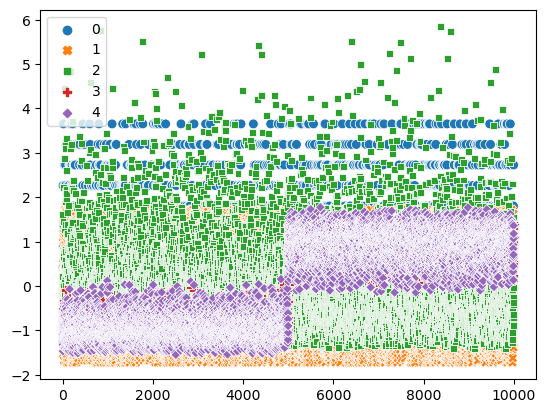

In [15]:
#visualize
ax=sns.scatterplot(data=scaled_df, s=50)

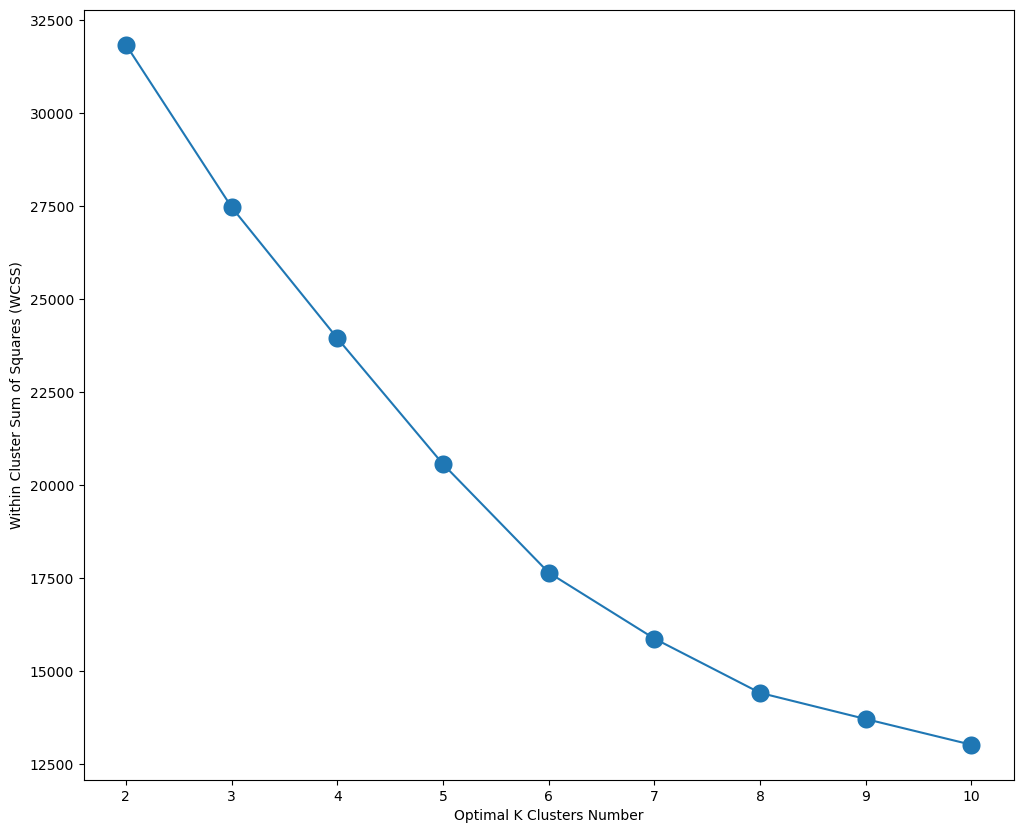

In [16]:
#find optimal k value
wcss=[]
for k in range (2, 11):
    model=KMeans(n_clusters=k, n_init=50, random_state=300)
    model.fit(scaled_df)
    wcss.append(model.inertia_)
wcss_s=pd.Series(wcss, index=range(2, 11))

plt.figure(figsize=(12, 10))
ax=sns.lineplot(y=wcss_s, x=wcss_s.index)
ax=sns.scatterplot(y=wcss_s, x=wcss_s.index, s=200)
ax=ax.set(xlabel="Optimal K Clusters Number",
          ylabel="Within Cluster Sum of Squares (WCSS)")

In [ ]:
silhouette = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, n_init=25, random_state=300)
    model.fit(scaled_df)
    silhouette.append(silhouette_score(scaled_df, model.labels_))

silhouette_s=pd.Series(silhouette, index=range(2, 11))

In [ ]:
silhouette_score=silhouette_score(scaled_df, k_model.labels_)
silhouette_score

In [ ]:
plt.figure(figsize=(12, 10))
ax=sns.lineplot(y=silhouette_s, x=silhouette_s.index)
ax=sns.scatterplot(y=silhouette_s, x=silhouette_s.index, s=200)
ax=ax.set(xlabel="Optimal K Cluster Number",
          ylabel="Silhouette Score Average")

In [ ]:
#final model
fin_model=KMeans(n_clusters=3, n_init=25, random_state=300)
fin_model.fit(scaled_df)

In [ ]:
centeroid=pd.DataFrame(fin_model.cluster_centers_)
centeroid

In [ ]:
#label clusters
red_df["Cluster"]=fin_model.labels_.tolist()
red_df.head(12)

In [ ]:
Patients=pd.DataFrame(red_df)

In [ ]:
Patients.agg({
    "Children" : "median",
    "Age" : "median",
    "Income" : "median",
    "Initial_days" : "median", 
    "TotalCharge" : "median",}).round(2)

In [ ]:
Patients.groupby("Cluster").agg({
     "Children" : "median",
    "Age" : "median",
    "Income" : "median",
    "Initial_days" : "median", 
    "TotalCharge" : "median",})